# K-Nearest Neighbors (KNN)

**Goal**: KNN is a non-parametric, instance-based learning algorithm used for classification and regression. It makes predictions based on the majority class or average value of the $k$ nearest neighbors in the training set.

**Use Cases**:
- Image recognition
- Recommendation systems
- Anomaly detection
- Baseline classifiers

**Steps of KNN**:
1. Choose the number of neighbors $k$
2. Calculate distances between query point and all training data
3. Sort distances and select the $k$ closest points
4. Predict the class (classification) or average value (regression)

**Key Concepts**:
- Euclidean / Manhattan / Minkowski distance
- Curse of dimensionality
- Choosing the right $k$
- Weighted KNN
- Distance metrics in high dimensions


## Introduction to KNN

K-Nearest Neighbors (KNN) is a **lazy learning** algorithm that does not build an internal model. Instead, it memorizes the training data and defers all computation to query time.

### Classification:
Given a test point $x$, find the $k$ closest points in the training set and assign the label that is most frequent among them.

### Regression:
Predict the average (or weighted average) of the target values of the $k$ nearest neighbors.

### Distance:
A common distance metric is Euclidean:
$$
d(x_i, x_j) = \sqrt{ \sum_{l=1}^{d} (x_i^{(l)} - x_j^{(l)})^2 }
$$

### Limitations:
- Computationally expensive at inference time (no training)
- Sensitive to feature scaling
- Degrades in high-dimensional space (curse of dimensionality)

### Decision boundaries:
KNN tends to form very **nonlinear** decision boundaries depending on the density of data and value of $k$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_classification(n_samples=200, n_features=2, n_classes=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN function
def knn_predict(X_train, y_train, x_query, k=5):
    distances = np.linalg.norm(X_train - x_query, axis=1)
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_indices]
    most_common = Counter(nearest_labels).most_common(1)
    return most_common[0][0]

# Predict on test set
y_pred = np.array([knn_predict(X_train, y_train, x, k=5) for x in X_test])
accuracy = np.mean(y_pred == y_test)
print("Accuracy (from scratch):", accuracy)


Accuracy (from scratch): 0.9833333333333333


Accuracy (scikit-learn): 0.9833333333333333


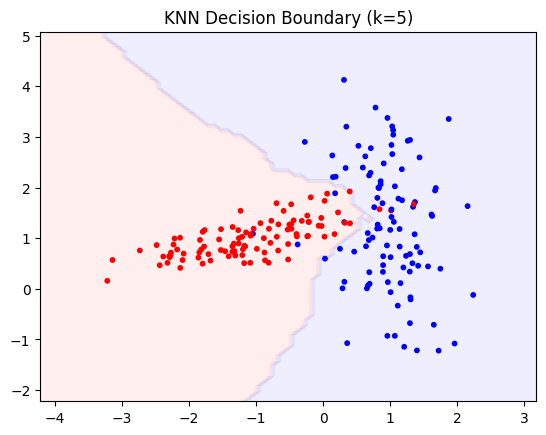

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Fit model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_lib = knn.predict(X_test)

# Accuracy
print("Accuracy (scikit-learn):", accuracy_score(y_test, y_pred_lib))

# Plot decision boundary
from matplotlib.colors import ListedColormap

h = .1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['red', 'blue']), s=10)
plt.title("KNN Decision Boundary (k=5)")
plt.show()


## Further Topics to Explore

1. Weighted KNN (closer neighbors have higher vote weight)
2. KNN for regression
3. KD-Trees and Ball Trees for faster KNN search
4. KNN with different distance metrics (e.g., Mahalanobis)
5. Feature scaling and dimensionality reduction before KNN
